# Apresenta√ß√£o ‚úíÔ∏è

Notebook destinado ao estudo da recupera√ß√£o de informa√ß√£o de banco de dados vetorial. Apesar da recupera√ß√£o ser realizada por meio da semelhan√ßa vetorial entre o elemento de consulta em rela√ß√£o aos dados que est√£o armazenados, nem sempre ela consegue retornar informa√ß√µes relevantes.

Em virtude disso, esse notebook se debru√ßa ao estudo de t√©cnicas que buscam ultrapassar esse obst√°culo, sendo capaz de prover ao usu√°rio respostas relevantes com base em sua consulta, sem trazer termos que, ainda que sejam similares do ponto de vista vetorial, pouco contribuem para o que o usu√°rio havia consultado.

Para isso ser√° utilizado o framework chroma, que cria banco de dados vetorial, juntamente com o framework langchain.

## Biblioteca üìö

In [1]:
!pip install langchain langchain__community langchain_google_genai chromadb -q

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 975.5/975.5 kB 7.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.2/2.2 MB 19.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 559.5/559.5 kB 6.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 337.4/337.4 kB 12.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 127.5/127.5 kB 2.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 163.9/163.9 kB 10.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [2]:
!pip install google-generativeai -q

In [3]:
!pip install pypdf -q

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 290.4/290.4 kB 4.1 MB/s eta 0:00:00


In [4]:
!pip install sentence-transformers -q

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 227.1/227.1 kB 3.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21.3/21.3 MB 56.3 MB/s eta 0:00:00


In [5]:
!pip install umap-learn -q

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.7/85.7 kB 2.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 56.9/56.9 kB 5.3 MB/s eta 0:00:00


In [6]:
import os
import umap.umap_ as umap
import numpy as np
import chromadb
import google.generativeai as genai

from langchain.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter

from langchain_google_genai import ChatGoogleGenerativeAI

from langchain import PromptTemplate
from langchain.chains import LLMChain

from pypdf import PdfReader

from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

from tqdm import tqdm

## Definindo as vari√°veis de ambiente



In [7]:
os.environ["GOOGLE_API_KEY"] = ""

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

## Definindo o modelo de LLM de uso

In [8]:
llm = ChatGoogleGenerativeAI(
    model = "gemini-1.5-pro-latest",
    temperature=0.2
)

## Carregando os dados üíæ

In [9]:
file_path = "/content/microsoft_annual_report_2022.pdf"
reader = PdfReader(file_path)


pdf_text = [p.extract_text() for p in reader.pages]

# Filtrando strings vazias para que apenas retornem texto.

pdf_text = [text for text in pdf_text if text]

In [10]:
len(pdf_text)

92

In [11]:
# Visualizando o texto extra√≠do.

pdf_text[0:2]

['   \n',
 '1 Dear shareholders, colleagues, customers, and partners:  \nWe are living through a period of historic economic, societal, and geopolitical change. The world in 2022 looks nothing like \nthe world in 2019. As I write this, inflation is at a 40 -year high, supply chains are stretched, and the war in Ukraine is \nongoing. At the same time, we are entering a technological era with the potential to power awesome advancements \nacross every sector of our economy and society. As the world‚Äôs largest software company, this places us at a historic \nintersection of opportunity and responsibility to the world around us.  \nOur mission to empower every person and every organization on the planet to achieve more has never been more \nurgent or more necessary. For all the uncertainty in the world, one thing is clear: People and organizations in every \nindustry are increasingly looking to digital technology to overcome today‚Äôs challenges and emerge stronger. And no \ncompany is bet

## Dividindo o texto

A t√©cnica de divis√£o de texto visa otimizar o processo de consulta, de modo a reduzir o ru√≠do que o termo a ser consultado poderia sofrer em rela√ß√£o ao conjunto total de dados presentes. Desse modo, segmentando parte a parte, torna-se mais f√°cil para extrair a informa√ß√£o relevante com base na similaridade entre os vetores.

In [12]:
recursive_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1200,
    chunk_overlap = 200,
    length_function = len,
    separators = ["\n\n", "\n",".", " ", "", "?"],
)

In [13]:
text_splitted = recursive_splitter.split_text('\n\n'.join(pdf_text))

In [14]:
len(text_splitted)

313

In [15]:
token_splitter = SentenceTransformersTokenTextSplitter(
    tokens_per_chunk=256,
    chunk_overlap=0)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
token_split_text = []

for text in text_splitted:
  token_split_text += token_splitter.split_text(text)

In [17]:
len(token_split_text)

334

In [18]:
print(f"Tamanho do texto orginal : {len(pdf_text)}")
print(f"Tamanho do texto na primeira divis√£o : {len(text_splitted)}")
print(f"Tamanho do texto dividido na segunda divis√£o : {len(token_split_text)}")

Tamanho do texto orginal : 92
Tamanho do texto na primeira divis√£o : 313
Tamanho do texto dividido na segunda divis√£o : 334


## Instanciando o modelo de embedding adotado

O modelo de embedding √© respons√°vel por transformar termos de linguagem natural para a sua representa√ß√£o vetorial, tornando poss√≠vel o armazenamento de informa√ß√£o de algo que anteriormente era texto em um banco de dados vetorial.

In [19]:
embedding = SentenceTransformerEmbeddingFunction()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Criando o banco de dados vetorial

In [20]:
# Criando o objeto client que me permitir√° interagir
# com o ChromaDB, para criar o banco de dados vetorial.

chroma_client = chromadb.Client()

In [21]:
# Criando o banco de dados vetorial.

chroma_collection = chroma_client.create_collection(name="ai_agents", embedding_function=embedding)

In [22]:
# Gerando uma lista de identifica√ß√£o para cada por√ß√£o
# presente no meu banco de dados vetorial.

ids = [str(i) for i in range(len(token_split_text))]

In [23]:
# Uma vez criado o banco de dados vetorial, agora passo
# os documentos, junto de sua identifica√ß√£o a ele.

chroma_collection.add(ids=ids, documents= token_split_text)

In [24]:
# Verificando a quantidade de itens presentes no banco de dados vetorial :

chroma_collection.count()

334

## Realizando a consulta

In [25]:
query = "What is about this article ?"

result = chroma_collection.query(query_texts=[query], n_results=3)


In [26]:
retrieved_documents = result["documents"]

In [43]:
retrieved_documents

[['the opportunity to apply technology to make a real difference for every customer, community, and country has never been greater. and i truly believe if we continue to live our mission, embrace our responsibility, and grasp that opportunity, there is no limit to what we can achieve for the world in the year ahead and beyond. satya nadella chairman and chief executive officer october 24, 2022',
  'safeguarding electoral processes is as salient as ever in today ‚Äô s geopolitical climate. our accountguard nation - state threat notification service protects more than 4 million accounts of election officials, human rights organizations, journalists, and other organizations. our efforts to preserve and protect journalism in the united states and mexico have been extended globally through new partnerships with the thomson reuters foundation, report for the world, and others. this year, we responded to six humanitarian emergencies in five countries through donations, technology, services, a

## Realizando a consulta com a LLM

In [27]:
def rag(query, retrieved_documents, model = llm):

  information = '\n\n'.join(retrieved_documents[0])

  prompt_template = PromptTemplate(
      input_variables=["query", "information"],
      template="""
      You are a helpful, experienced information systems professional. You need to respond accurately and elucidatively to the user's query regarding Microsoft's annual report. You will be presented with the user's question and the relevant parts of the annual report. Answer the user's question using only the information presented to you.

      Question: {query}
      Information : {information}
      """
      )

  chain = LLMChain(llm=model, prompt=prompt_template)
  response = chain.run(query=query, information=information)

  return response

In [28]:
output = rag(query, retrieved_documents)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


In [29]:
output

'This excerpt from Microsoft\'s annual report, penned by CEO Satya Nadella, emphasizes the significant opportunity to leverage technology for positive global impact. It highlights Microsoft\'s commitment to:\n\n* **Using technology for good:** This includes safeguarding elections, supporting journalism, and aiding humanitarian efforts through initiatives like "AccountGuard" and "AI for Humanitarian Action."\n* **Promoting inclusive economic growth:** Microsoft aims to make technology accessible and provide digital skills training to ensure everyone benefits from technological advancements. \n\nEssentially, the message is that Microsoft believes in technology\'s power to drive positive change and is actively working towards a more inclusive, equitable, and sustainable future. \n'

## Identificando quando somente a pesquisa por semelhan√ßa entre vetores falha

Uma vez realizado a t√©cnica de RAG padr√£o, objetiva-se agora visualizar a sua efici√™ncia na recupera√ß√£o de informa√ß√£o que n√£o apenas seja semelhante do ponto de vista vetorial, mas relevante √† consulta, isto √©, que consiga respond√™-la de forma eficiente.

Para isso, irei dispor da visualiza√ß√£o gr√°fica, para visualizar o banco de dados vetorial e, posteriormente, quais elementos est√£o sendo recuperados e se s√£o apenas aqueles que s√£o relevantes ou similares vetorialmente.

In [30]:
# Para realizar a visualiza√ß√£o do banco de dados vetorial, tendo em vista
# que ele √© multidimensional, terei que realizar uma transforma√ß√£o dimensional
# para que ele caiba em duas dimens√µes para facilitar a compreens√£o.

embeddings = chroma_collection.get(include=["embeddings"])["embeddings"]

umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [31]:
def project_embeddings(embeddings, umap_transform):

    umap_embeddings = np.empty((len(embeddings),2))

    for i, embedding in enumerate(tqdm(embeddings)):
        umap_embeddings[i] = umap_transform.transform([embedding])

    return umap_embeddings

In [32]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 334/334 [06:34<00:00,  1.18s/it]


(-1.5580700933933258, 8.197751313447952, 3.004087138175964, 8.215628457069396)

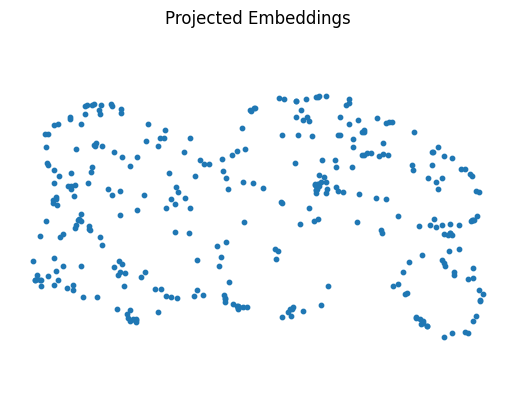

In [33]:
# Visualizando o banco de dados vetorial de uso em 2d.

# Nesse espa√ßo, h√° armazenado os itens referentes ao artigo carregado,
# lido e dividido.

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

In [34]:
# Visualizando os elementos trazidos durante o momento da consulta.

query = "What is the strategy around artificial intelligence (AI) ?"

results = chroma_collection.query(query_texts=[query], n_results=5, include=['documents',
                                                                             'embeddings'])

retrieved_documents = results["documents"][0]

In [35]:
# Visualizando o documento recuperado.

retrieved_documents[0]

'while simplifying security and management. from infrastructure and data, to business applications and collaboration, we provide unique, differentiated value to customers. we are building a distributed computing fabric ‚Äì across cloud and the edge ‚Äì to help every organization build, run, and manage mission - critical workloads anywhere. in the next phase of innovation, artificial intelligence ( ‚Äú ai ‚Äù ) capabilities are rapidly advancing, fueled by data and knowledge of the world. we are enabling metaverse experiences at all layers of our stack, so customers can more effectively model, automate, simulate, and predict changes within their industrial environments, feel a greater sense of presence in the new world of hybrid work, and create custom immersive worlds to enable new opportunities for connection and experimentation. what we offer founded in 1975, we develop and support software, services, devices, and solutions that deliver new value for customers and help people and bus

In [36]:
query_embeddings = embedding(query)[0]
retrieved_embeddings = results["embeddings"][0]

In [37]:
projected_query_embedding = project_embeddings([query_embeddings], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [00:05<00:00,  1.14s/it]


(-1.5580700933933258, 8.197751313447952, 3.004087138175964, 8.215628457069396)

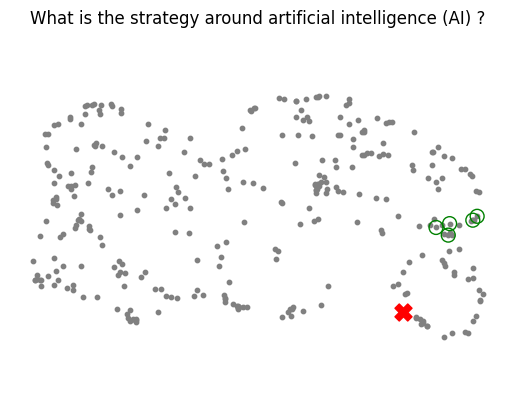

In [38]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

No gr√°fico acima √© poss√≠vel observar que nem sempre o termo efetivamente consultado √© aquele que poderia prover a resposta mais relevante. Nele, os vetores que poderiam trazer as respostas relevantes √† consulta s√£o marcados em verde, equanto que o vetor selecionado √© marcado em vermelho.

Nota-se que ele dista bastante dos vetores mais relevantes, o que significa em termos gerais que a resposta informada a consulta do usu√°rio n√£o ser√° relevante, mesmo que possa ser vetorialmente similar.

Com base nisso, surge algumas t√©cnicas que visam prover uma melhor recupera√ß√£o da informa√ß√£o, a fim de retornar informa√ß√µes que sejam relevantes para responder as consultas do usu√°rio e que ser√£o trazidas a seguir.

## Query Expansion

Uma das t√©cnicas utilizadas para prover retorno de informa√ß√£o relevante √†s consultas do usu√°rios √© conhecida como Query Expansion, a qual apresenta duas poss√≠veis abordagens : respostas hipot√©ticas ou sugest√µes de tipos de consulta realizadas, ambas, por um modelo de LLM.

No caso das respostas hipot√©ticas, o que se faz √© informar a query ao modelo de LLM e requisitar a ele que com base nisso gere uma poss√≠vel resposta. Uma vez a resposta ter sido gerada, combina-se ela com a query e os envia como consulta, em conjunto, ao banco de dados vetorial. A partir dessa combina√ß√£o, delimita-se melhor o campo de busca, como forma que o elemento a ser consultado ser√° mais aderente aos elementos que possuem maior relev√¢ncia.

No caso das sugest√µes de tipos de consulta, o processo final √© similar, mas o in√≠cio √© diferente. Ao inv√©s de requisitar uma poss√≠vel resposta ao modelo com base na query, por meio dela busca-se encontrar poss√≠vel consultas que poderiam melhor delimitar o campo de busca, tornando-as mais precisas quando comparadas com a consulta original que poderia ser vaga.

Desse modo, independente da abordagem adotada, essa t√©cnica reside justamente numa expans√£o da consulta, como o nome sugere, a partir da qual busca-se delimitar melhor o campo de busca, durante o processo de recupera√ß√£o, como forma de retornar n√£o apenas conte√∫dos que sejam semelhantes do ponto de vista vetorial, mas tamb√©m relevantes.

### Expansion com respostas hipot√©ticas

In [39]:
def hypothetical_answer(query, model = llm):

  template = PromptTemplate(
      input_variables=["query"],
      template="""
      You are a helpful, experienced information systems professional.
      Provide an example answer to the given question, that might be found
      in a document like an annual report.

      Question : {query}

      Helpful Answer : """  )

  chain = LLMChain(llm=model, prompt=template)
  response = chain.run(query=query)

  return response

In [40]:
original_query = "What is the strategy around artificial intelligence (AI) ?"
hypothetical_answer_output = hypothetical_answer(original_query)

In [104]:
# Visualizando a resposta hipot√©tica.

hypothetical_answer_output

'##  Our Artificial Intelligence Strategy \n\nWe recognize the transformative potential of artificial intelligence (AI) to enhance our operations, improve decision-making, and deliver exceptional customer experiences. Our AI strategy is built on three core pillars:\n\n**1.  Enhancing Operational Efficiency:** We are actively integrating AI and machine learning algorithms into our core operational processes. This includes:\n\n*   **Automating routine tasks:**  Leveraging AI to automate repetitive tasks, freeing up our workforce to focus on higher-value activities that require creativity and complex problem-solving. \n*   **Predictive maintenance:** Implementing AI-powered predictive models to anticipate and address potential equipment failures, minimizing downtime and optimizing maintenance schedules. \n*   **Optimizing resource allocation:** Utilizing AI algorithms to analyze data and optimize resource allocation across the organization, improving efficiency and reducing costs.\n\n**2.

In [41]:
joint_query = f"{original_query} {hypothetical_answer_output}"

joint_query

'What is the strategy around artificial intelligence (AI) ? ##  Our Artificial Intelligence Strategy \n\nWe recognize the transformative potential of artificial intelligence (AI) across all facets of our business. Our AI strategy is built on three core pillars: \n\n**1. Enhance Operations and Efficiency:** We are actively integrating AI and machine learning algorithms to optimize internal processes, automate repetitive tasks, and improve operational efficiency. This includes leveraging AI for:\n\n* **Predictive Maintenance:** Anticipating and addressing potential equipment failures to minimize downtime and maintenance costs.\n* **Supply Chain Optimization:** Forecasting demand, optimizing inventory levels, and streamlining logistics for improved efficiency and cost savings.\n* **Fraud Detection and Prevention:** Implementing AI-powered systems to identify and mitigate potential fraudulent activities, enhancing security and trust.\n\n**2. Drive Innovation and Growth:** We are committed 

In [42]:
results = chroma_collection.query(query_texts=joint_query, n_results=5, include=['documents', 'embeddings'])
retrieved_documents = results['documents'][0]

In [43]:
retrieved_embeddings = results['embeddings'][0]
original_query_embedding = embedding([original_query])
augmented_query_embedding = embedding([joint_query])

projected_original_query_embedding = project_embeddings(original_query_embedding, umap_transform)
projected_augmented_query_embedding = project_embeddings(augmented_query_embedding, umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [00:06<00:00,  1.22s/it]


(-1.5580700933933258, 8.197751313447952, 3.004087138175964, 8.215628457069396)

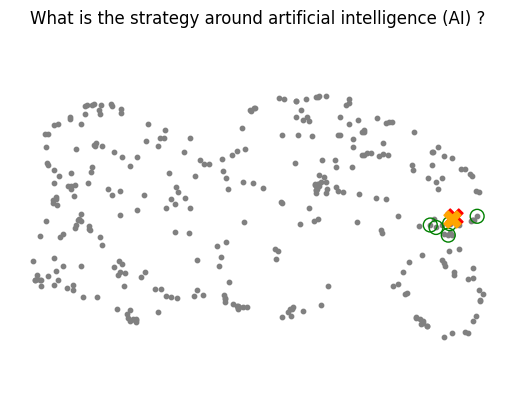

In [44]:
import matplotlib.pyplot as plt

# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
plt.scatter(projected_original_query_embedding[:, 0], projected_original_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_augmented_query_embedding[:, 0], projected_augmented_query_embedding[:, 1], s=150, marker='X', color='orange')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{original_query}')
plt.axis('off')

### Expansion com mais querys

In [46]:
def argument_multiple_query(query, model = llm):

  template = PromptTemplate(
      input_variables=["query"],
      template="""
      You are a helpful, experienced information systems professional.
      Suggest up to five additional related questions to help them find the information they need, for the provided question. "
      Suggest only short questions without compound sentences. Suggest a variety of questions that cover different aspects of the topic."
      Make sure they are complete questions, and that they are related to the original question."
      Output one question per line. Do not number the questions."

      Question : {query}

      Helpful Answer : """  )

  chain = LLMChain(llm=model, prompt=template)
  response = chain.run(query=query)

  return response

In [47]:
original_query = "What is the strategy around artificial intelligence (AI) ?"
argumented_multiple_query_output = argument_multiple_query(original_query)

In [49]:
queries = f'{original_query}  {argumented_multiple_query_output}'
results = chroma_collection.query(query_texts=queries, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

In [50]:
retrieved_embeddings = results['embeddings'][0]
original_query_embedding = embedding([original_query])
augmented_query_embedding = embedding([joint_query])

projected_original_query_embedding = project_embeddings(original_query_embedding, umap_transform)
projected_augmented_query_embedding = project_embeddings(augmented_query_embedding, umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [00:06<00:00,  1.21s/it]


(-1.5580700933933258, 8.197751313447952, 3.004087138175964, 8.215628457069396)

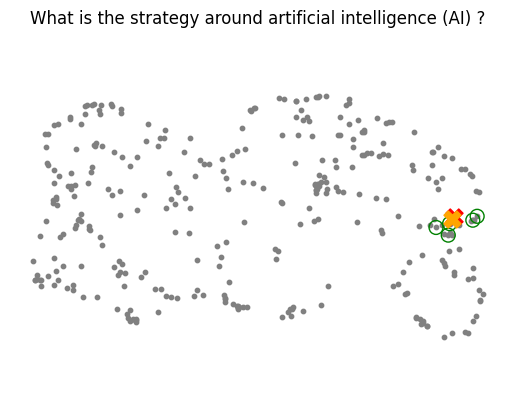

In [51]:
import matplotlib.pyplot as plt

# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
plt.scatter(projected_original_query_embedding[:, 0], projected_original_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_augmented_query_embedding[:, 0], projected_augmented_query_embedding[:, 1], s=150, marker='X', color='orange')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{original_query}')
plt.axis('off')